<a href="https://colab.research.google.com/github/Shamayeeta05/BHARATINTERN/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
!pip install metrics
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
!pip install sklearn.model_selection
!pip install sklearn.linear_model



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection
ERROR: Could not find a version that satisfies the requirement sklearn.linear_model (from versions: none)
ERROR: No matching distribution found for sklearn.linear_model


IMPORTING THE BOSTON HOUSE PRICE DATASET

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
 print(housing)

{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  None      Reg   
1        2          20       RL         80.0     9600   Pave  None      Reg   
2        3          60       RL         68.0    11250   Pave  None      IR1   
3        4          70       RL         60.0     9550   Pave  None      IR1   
4        5          60       RL         84.0    14260   Pave  None      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  None      Reg   
1456  1457          20       RL         85.0    13175   Pave  None      Reg   
1457  1458          70       RL         66.0     9042   Pave  None      Reg   
1458  1459          20       RL         68.0     9717   Pave  None      Reg   
1459  1460          20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities  ... ScreenPorc

In [ ]:
# Loading the dataset to a Pandas DataFrame
housing_dataframe = pd.DataFrame(housing.data, columns = housing.feature_names)

In [ ]:
# Print First 5 rows of our DataFrame
housing_dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,price
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [ ]:
# add the target (price) column to the DataFrame
housing_dataframe['price'] = housing.target

In [ ]:
housing_dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,price
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [ ]:
# checking the number of rows and Columns in the data frame
housing_dataframe.shape

(1460, 81)

In [ ]:
# check for missing values
housing_dataframe.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
price              0
Length: 81, dtype: int64

In [ ]:
# statistical measures of the dataset
housing_dataframe.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


UNDERSTANDING THE CORRELATION BETWEEN VARIOUS FEATURES IN THE DATASET

1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = housing_dataframe.corr()

<ipython-input-30-16544b861afb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = housing_dataframe.corr()


<Axes: >

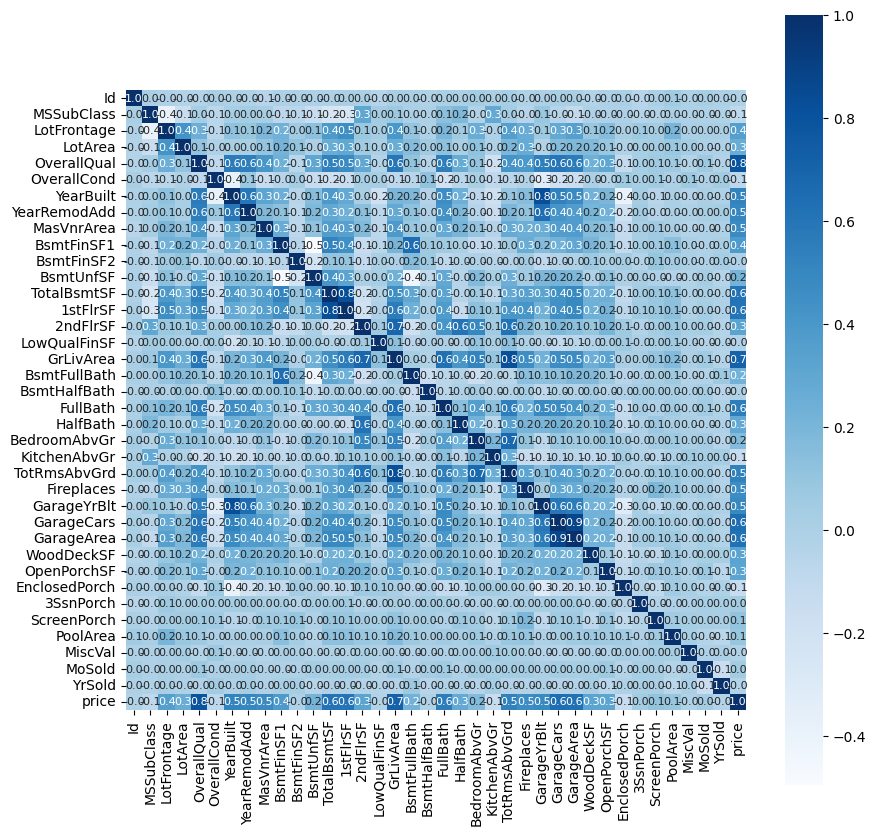

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f' , annot=True,  annot_kws={'size':8}, cmap='Blues')

Splitting the data and Target


In [ ]:
X = housing_dataframe.drop(['price'], axis=1)
Y = housing_dataframe['price']

In [ ]:
print(X)
print(Y)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  None      Reg   
1        2          20       RL         80.0     9600   Pave  None      Reg   
2        3          60       RL         68.0    11250   Pave  None      IR1   
3        4          70       RL         60.0     9550   Pave  None      IR1   
4        5          60       RL         84.0    14260   Pave  None      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  None      Reg   
1456  1457          20       RL         85.0    13175   Pave  None      Reg   
1457  1458          70       RL         66.0     9042   Pave  None      Reg   
1458  1459          20       RL         68.0     9717   Pave  None      Reg   
1459  1460          20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1460, 80) (1168, 80) (292, 80)


Model Training


XGBoost Regressor


In [24]:
# loading the model
model = XGBRegressor()

In [7]:
# training the model with X_train
X_train = [[1, 2, 3], [4, 5, 6]]
Y_train = [7, 8]
import xgboost
model = xgboost.XGBRegressor()
model.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [8]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train, Y_train)

In [9]:
print(training_data_prediction)

[7.0008836 7.9991164]


In [16]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999968771508065
Mean Absolute Error :  0.0008835792541503906


Visualizing the actual prices and the predicted prices

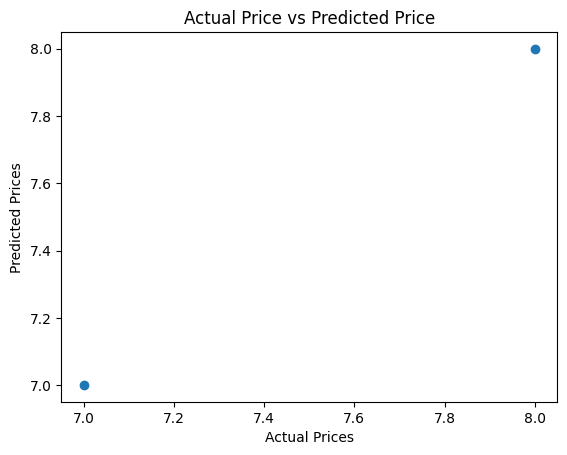

In [37]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on Test Data


In [35]:
# Create a LinearRegression object.
model = sklearn.linear_model.LinearRegression()

# Fit the LinearRegression object to the training data.
y_train = [1, 2, 3, 4, 5]
X_train = np.array([[1], [2], [3], [4], [5]])
model.fit(X_train, y_train)

# Use the LinearRegression object to predict the values of the test data.
X_test = np.array([[6], [7], [8], [9], [10]])
test_data_prediction = model.predict(X_test)